In [52]:
import pandas as pd
import numpy as np
import seaborn as sn
fib_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE113nnn/GSE113957/suppl/GSE113957_fpkm.txt.gz'

In [53]:
fib=pd.read_table(fib_file,index_col=0)
HGPS=['139_8_Female-HGPS_Caucasian','141_8_Male-HGPS_Unknown','197_2yr3mos_F_Unknown','198_3yr9mos_F_Unknown',
      '199_4yr8mos_F_Unknown','200_8yr6mos_M_Unknown','201_6ys11mos_F_Unknown','202_5yr0mos_F_Unknown',
      '203_8yr10mos_M_Unknown','204_3yr0mos_F_Unknown']
fib=fib[[c for c in fib.columns if 'HGPS' not in c]]
fib=fib.iloc[:,7:]

In [54]:
df=pd.read_table('../data/refseq.txt',index_col=0)
df['ref']=(df['RefSeq mRNA ID'].astype(str)+df['RefSeq ncRNA ID'].astype(str))
df['ref']=df.ref.str.strip('nan')
df=df[df.ref!='']

In [55]:
df=fib.merge(df[['Gene name','ref']],left_index=True,right_on='ref').drop('ref',1)

In [56]:
#fib=df.groupby('Gene name').sum()
fib=df.drop('Gene name',1)

In [57]:
ages=fib.columns.str.split('_').str[1].str.strip('mos').str.strip('yr').str.strip('YR').tolist()
ages=[int(a[0]) if 'yr' in a or 'ys' in a else int(a) for a in ages]
fib=fib.T
fib=np.log10(fib+1)
fib['age']=ages

In [58]:
cor=fib.corrwith(fib.age)

In [59]:
fl=fib[fib.age<fib.age.quantile(1/3)].median()
fh=fib[fib.age>fib.age.quantile(2/3)].median()
fm=fib.median()
df=pd.concat([fl,fm,fh],1)
df.columns=['low','mid','high']

In [60]:
h1=pd.read_table('../data/h1.txt')
h1.index=h1.Name.str.split('.').str[0]

In [61]:
fib=df.drop('age')

In [62]:
fib=fib.loc[fib.index.intersection(h1.index)]

In [63]:
fib['h1']=np.log10(h1.loc[fib.index].TPM+1)

<AxesSubplot:>

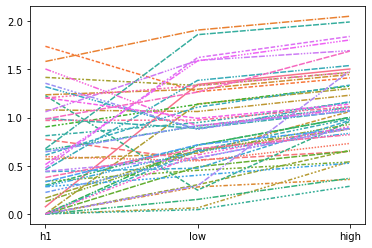

In [65]:
data=fib.loc[cor.dropna().sort_values().drop('age').tail(50).index]
sn.lineplot(data=data[['h1','low','high']].T,legend=False)

<AxesSubplot:>

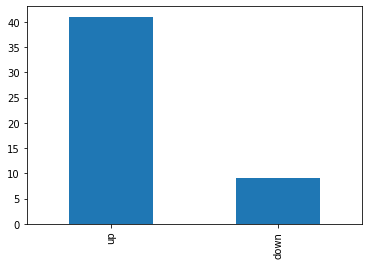

In [66]:
data['up']=data['h1']<data['mid']
data['down']=data['h1']>data['mid']
data.sum()[['up','down']].plot(kind='bar')

<AxesSubplot:>

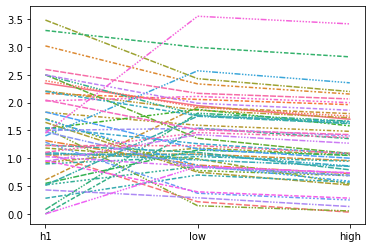

In [67]:
data=fib.loc[cor.dropna().sort_values().drop('age').head(50).index]
sn.lineplot(data=data[['h1','low','high']].T,legend=False)

<AxesSubplot:>

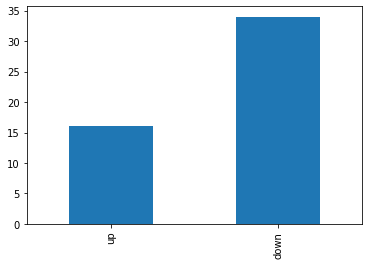

In [68]:
data['up']=data['h1']<data['mid']
data['down']=data['h1']>data['mid']
data.sum()[['up','down']].plot(kind='bar')